In [1]:
print("2. ร้านอาหารที่คนแต่ล่ะช่วงวัยสนใจมากที่สุดคือร้านอาหารแนวอะไร และปัจจัยใดที่ส่งผลมากที่สุดที่ทำให้คนในแต่ล่ะช่วงวัยไปใช้บริการในร้านนั้นๆ")

2. ร้านอาหารที่คนแต่ล่ะช่วงวัยสนใจมากที่สุดคือร้านอาหารแนวอะไร และปัจจัยใดที่ส่งผลมากที่สุดที่ทำให้คนในแต่ล่ะช่วงวัยไปใช้บริการในร้านนั้นๆ


In [2]:
print("ช่วงวัย :\nวัยเรียน <= 22\nวัยทำงาน <= 60\nวัยสูงอายุ > 60")

ช่วงวัย :
วัยเรียน <= 22
วัยทำงาน <= 60
วัยสูงอายุ > 60


### User Dataset

In [3]:
import pandas as pd
import numpy as np
userdf = pd.read_csv('userprofile.csv')
userdf

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,U1134,22.149654,-100.998610,false,casual drinker,no preference,family,public,single,independent,1991,variety,hard-worker,Catholic,student,black,52,medium,1.65
134,U1135,22.170396,-100.949936,false,casual drinker,informal,family,on foot,single,kids,1988,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54
135,U1136,22.149607,-100.997235,true,social drinker,no preference,friends,car owner,single,independent,1990,retro,thrifty-protector,Catholic,student,black,50,low,1.60
136,U1137,22.144803,-100.944623,false,social drinker,formal,family,public,single,independent,1989,eco-friendly,hard-worker,Catholic,student,blue,72,low,1.78


In [4]:
userdf = userdf.drop(columns=['latitude', 'longitude', 'marital_status','hijos',
                              'interest', 'color', 'weight', 'height'])

In [5]:
# จำแนกช่วงวัย
age = 2020 - userdf.birth_year
userdf['life_stage'] = age

condlist = [
   userdf.life_stage <= 60,
   userdf.life_stage > 60
]
choicelist = ['adult', 'elder']
userdf.life_stage = np.select(condlist, choicelist, default='student')

# แบ่งตามอาชีพ [คนที่เป็นนักเรียน ยังไม่ทำงาน]
userdf.loc[userdf.activity.str.contains('student'), 'life_stage' ] = 'student'

In [6]:
# การเข้าร้านอาหาร / ประเภทการจ่ายเงิน
userfood = pd.read_csv('usercuisine.csv')
userpay = pd.read_csv('userpayment.csv')

userdf['resCuisine'] = userfood.Rcuisine
userdf['payment'] = userpay.Upayment
userdf.set_index('userID')

,smoker,drink_level,dress_preference,ambience,transport,birth_year,personality,religion,activity,budget,life_stage,resCuisine,payment
userID,,,,,,,,,,,,,
U1001,false,abstemious,informal,family,on foot,1989,thrifty-protector,none,student,medium,student,American,cash
U1002,false,abstemious,informal,family,public,1990,hunter-ostentatious,Catholic,student,low,student,Mexican,cash
U1003,false,social drinker,formal,family,public,1989,hard-worker,Catholic,student,low,student,Mexican,cash
U1004,false,abstemious,informal,family,public,1940,hard-worker,none,professional,medium,elder,Bakery,cash
U1005,false,abstemious,no preference,family,public,1992,thrifty-protector,Catholic,student,medium,student,Breakfast-Brunch,bank_debit_cards
...,...,...,...,...,...,...,...,...,...,...,...,...,...
U1134,false,casual drinker,no preference,family,public,1991,hard-worker,Catholic,student,medium,student,Mexican,VISA
U1135,false,casual drinker,informal,family,on foot,1988,hunter-ostentatious,Catholic,student,low,student,Mexican,cash
U1136,true,social drinker,no preference,friends,car owner,1990,thrifty-protector,Catholic,student,low,student,Mexican,cash


### Restaurant Dataset

In [7]:
resdf = pd.read_csv('geoplaces2.csv')
resdf = resdf.drop(columns=['latitude', 'longitude', 'the_geom_meter', 'address', 'city', 'state', 'fax', 'zip',
                            'url', 'franchise', 'area', 'other_services'])

In [8]:
# ระบบจ่ายเงิน / ประเภทอาหาร / ที่จอดรถ
respay = pd.read_csv('chefmozaccepts.csv')
rescuisine = pd.read_csv('chefmozcuisine.csv')
resparking = pd.read_csv('chefmozparking.csv')

resdf['payment'] = respay.Rpayment
resdf['cuisine'] = rescuisine.Rcuisine
resdf['parking'] = resparking.parking_lot
resdf.set_index('placeID')

,name,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,payment,cuisine,parking
placeID,,,,,,,,,,,
134999,Kiku Cuernavaca,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,cash,Spanish,public
132825,puesto de tacos,mexico,No_Alcohol_Served,none,informal,completely,low,familiar,VISA,Italian,none
135106,El Rinc�n de San Francisco,Mexico,Wine-Beer,only at bar,informal,partially,medium,familiar,MasterCard-Eurocard,Latin_American,none
132667,little pizza Emilio Portes Gil,?,No_Alcohol_Served,none,informal,completely,low,familiar,American_Express,Mexican,none
132613,carnitas_mata,Mexico,No_Alcohol_Served,permitted,informal,completely,medium,familiar,bank_debit_cards,Fast_Food,none
...,...,...,...,...,...,...,...,...,...,...,...
132866,Chaires,Mexico,No_Alcohol_Served,not permitted,informal,completely,medium,familiar,cash,Mexican,none
135072,Sushi Itto,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,VISA,Mediterranean,none
135109,Paniroles,?,Wine-Beer,not permitted,informal,no_accessibility,medium,quiet,MasterCard-Eurocard,Burgers,none


### จำแนกประเภทร้านอาหารที่คนแต่ละช่วงวัยสนใจ

In [9]:
# แยกประเภทร้านอาหาร
userdf.resCuisine = pd.Categorical(userdf.resCuisine)

In [10]:
# เปลี่ยนช่วงอายุเป็น categorical
userdf.life_stage = pd.Categorical(userdf.life_stage)
userdf.life_stage

0      student
1      student
2      student
3        elder
4      student
        ...   
133    student
134    student
135    student
136    student
137    student
Name: life_stage, Length: 138, dtype: category
Categories (3, object): [adult, elder, student]

In [11]:
print("จำนวนคน แต่ละช่วงวัย\nนักเรียน : %d\nวัยทำงาน : %d\nผู้สูงอายุ : %d"
      % (len(userdf.loc[userdf.life_stage=='student']),
         len(userdf.loc[userdf.life_stage=='adult']),
         len(userdf.loc[userdf.life_stage=='elder']) )
     )

จำนวนคน แต่ละช่วงวัย
นักเรียน : 113
วัยทำงาน : 20
ผู้สูงอายุ : 5


In [12]:
student = userdf.loc[userdf.life_stage=='student']
adult = userdf.loc[userdf.life_stage=='adult']
elder = userdf.loc[userdf.life_stage=='elder']

In [13]:
print("ประเภทร้านอาหารที่แต่ละช่วงวัยเข้ามากที่สุด\nนักเรียน : %s\nวัยทำงาน : %s\nผู้สูงอายุ : %s"
     % (student.resCuisine.value_counts().argmax(),
        adult.resCuisine.value_counts().argmax(),
        elder.resCuisine.value_counts().argmax())
     )

ประเภทร้านอาหารที่แต่ละช่วงวัยเข้ามากที่สุด
นักเรียน : Mexican
วัยทำงาน : Mexican
ผู้สูงอายุ : Mexican


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be

### 5 ปัจจัยหลักของuser

In [14]:
mexiStd = student.loc[userdf.resCuisine=='Mexican']
mexiAdu = adult.loc[userdf.resCuisine=='Mexican']
mexiEld = elder.loc[userdf.resCuisine=='Mexican']

In [15]:
# แยกเป็น 5 ปัจจัยหลัก 
userdf.smoker = pd.Categorical(userdf.smoker)
userdf.drink_level = pd.Categorical(userdf.drink_level)
userdf.transport = pd.Categorical(userdf.transport)
userdf.payment = pd.Categorical(userdf.payment)
userdf.budget = pd.Categorical(userdf.budget)

In [16]:
print("นักเรียน")

print("smoker")
print((student.smoker.value_counts() / len(student)*100))

print("\ndrinklevel")
print((student.drink_level.value_counts() / len(student)*100))

print("\ntransport")
print((student.transport.value_counts() / len(student)*100))

print("\nbudget")
print((student.budget.value_counts() / len(student)*100))

print("\npayment")
print((student.payment.value_counts() / len(student)*100))

นักเรียน
smoker
false    79.646018
true     20.353982
Name: smoker, dtype: float64

drinklevel
casual drinker    38.053097
abstemious        30.973451
social drinker    30.973451
Name: drink_level, dtype: float64

transport
public       62.831858
car owner    23.893805
on foot      11.504425
?             1.769912
Name: transport, dtype: float64

budget
medium    62.831858
low       30.973451
high       3.539823
?          2.654867
Name: budget, dtype: float64

payment
cash                   71.681416
bank_debit_cards       12.389381
VISA                   10.619469
American_Express        2.654867
MasterCard-Eurocard     2.654867
Name: payment, dtype: float64


In [17]:
print("วัยทำงาน")

print("smoker")
print((adult.smoker.value_counts() / len(adult)*100))

print("\ndrinklevel")
print((adult.drink_level.value_counts() / len(adult)*100))

print("\ntransport")
print((adult.transport.value_counts() / len(adult)*100))

print("\nbudget")
print((adult.budget.value_counts() / len(adult)*100))

print("\npayment")
print((adult.payment.value_counts() / len(adult)*100))

วัยทำงาน
smoker
false    80.0
true     15.0
?         5.0
Name: smoker, dtype: float64

drinklevel
abstemious        60.0
social drinker    25.0
casual drinker    15.0
Name: drink_level, dtype: float64

transport
public       50.0
car owner    30.0
?            15.0
on foot       5.0
Name: transport, dtype: float64

budget
medium    85.0
?         10.0
high       5.0
Name: budget, dtype: float64

payment
cash                75.0
bank_debit_cards    15.0
VISA                10.0
Name: payment, dtype: float64


In [18]:
print("ผู้สูงอายุ")

print("smoker")
print((elder.smoker.value_counts() / len(elder)*100))

print("\ndrinklevel")
print((elder.drink_level.value_counts() / len(elder)*100))

print("\ntransport")
print((elder.transport.value_counts() / len(elder)*100))

print("\nbudget")
print((elder.budget.value_counts() / len(elder)*100))

print("\npayment")
print((elder.payment.value_counts() / len(elder)*100))

ผู้สูงอายุ
smoker
false    60.0
?        40.0
Name: smoker, dtype: float64

drinklevel
abstemious        80.0
casual drinker    20.0
Name: drink_level, dtype: float64

transport
?            40.0
car owner    40.0
public       20.0
Name: transport, dtype: float64

budget
medium    60.0
?         40.0
Name: budget, dtype: float64

payment
cash    100.0
Name: payment, dtype: float64


### ร้าน Mexican ส่วนใหญ่เป็นแบบไหน

In [19]:
mexicanRes = resdf.loc[resdf.cuisine == 'Mexican']
mexicanRes

,placeID,name,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,payment,cuisine,parking
3,132667,little pizza Emilio Portes Gil,?,No_Alcohol_Served,none,informal,completely,low,familiar,American_Express,Mexican,none
5,135040,Restaurant los Compadres,Mexico,Wine-Beer,none,informal,no_accessibility,high,familiar,cash,Mexican,none
11,135069,Abondance Restaurante Bar,Mexico,Wine-Beer,none,informal,no_accessibility,low,familiar,cash,Mexican,none
13,135076,Restaurante Pueblo Bonito,Mexico,Wine-Beer,none,informal,no_accessibility,high,familiar,MasterCard-Eurocard,Mexican,valet parking
15,132870,Tortas y hamburguesas el gordo,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,low,familiar,cash,Mexican,public
32,135053,La Fontana Pizza Restaurante and Cafe,Mexico,No_Alcohol_Served,section,informal,no_accessibility,high,familiar,MasterCard-Eurocard,Mexican,yes
33,135050,Restaurante la Estrella de Dima,Mexico,Wine-Beer,none,informal,no_accessibility,high,familiar,bank_debit_cards,Mexican,public
34,135025,El Rincon de San Francisco,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,cash,Mexican,yes
36,135057,El Herradero Restaurante and Bar,Mexico,Wine-Beer,section,informal,no_accessibility,medium,familiar,MasterCard-Eurocard,Mexican,yes
39,132954,la parroquia,?,No_Alcohol_Served,not permitted,informal,partially,medium,familiar,cash,Mexican,yes


In [20]:
# แปลงเป็น category
mexicanRes.alcohol = pd.Categorical(mexicanRes.alcohol)
mexicanRes.smoking_area = pd.Categorical(mexicanRes.smoking_area)
mexicanRes.accessibility = pd.Categorical(mexicanRes.accessibility)
mexicanRes.price = pd.Categorical(mexicanRes.price)
mexicanRes.payment = pd.Categorical(mexicanRes.payment)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
print("smoking_area")
print((mexicanRes.smoking_area.value_counts() / len(mexicanRes)*100))

print("\nalcohol")
print((mexicanRes.alcohol.value_counts() / len(mexicanRes)*100))

print("\naccessibility")
print((mexicanRes.accessibility.value_counts() / len(mexicanRes)*100))

print("\nprice")
print((mexicanRes.price.value_counts() / len(mexicanRes)*100))

print("\npayment")
print((mexicanRes.payment.value_counts() / len(mexicanRes)*100))

smoking_area
none             60.0
not permitted    20.0
section          12.0
permitted         8.0
Name: smoking_area, dtype: float64

alcohol
No_Alcohol_Served    68.0
Wine-Beer            32.0
Name: alcohol, dtype: float64

accessibility
no_accessibility    64.0
completely          24.0
partially           12.0
Name: accessibility, dtype: float64

price
medium    44.0
low       40.0
high      16.0
Name: price, dtype: float64

payment
cash                   48.0
MasterCard-Eurocard    20.0
VISA                   16.0
American_Express       12.0
bank_debit_cards        4.0
Name: payment, dtype: float64


### สรุป

In [22]:
print("ปัจจัยตามช่วงวัย & ร้านอาหารที่ได้รับความนิยม\nทุกช่วงวัยนิยมร้านอาหาร : Mexican")
print("\n80% ของร้านอาหารไม่มีที่ให้สูบบุหรี่ ซึ่ง20% ไม่อนุญาต และ60% ไม่มีพื้นที่ให้\nและแต่ละช่วงวัยมีคนที่ไม่สูบบุหรี่เลยเป็นจำนวน 50 %")
print("\nร้านอาหารไม่มี alcohol เป็นส่วนมาก แต่ถ้ามีจะเป็นพวก Wine, Beer ซึ่งเป็นเครื่องดื่มที่คนนิยมใช้เข้าสังคม แต่ข้อมูลยังไม่สมเหตุสมผลมากเพียงพอกับข้อมูลของ user")
print("\nร้านอาหารส่วนใหญ่เข้าถึงยาก รองลงมาคือ เข้าถึงได้ทั้งหมดและเข้าถึงง่าย แต่นักเรียนและวัยทำงานนิยมเดินทางด้วยขนส่งสาธารณะมากที่สุด ซึ่งควรจัดเป็นการเข้าถึงง่ายหรือได้ทั้งหมด จึงสามารถสรุปได้ว่าไม่ใช่ปัจจัยนี้อย่างแน่นอน")
print("\nราคาส่วนมากอยู่ปานกลางหรือต่ำ ตามลำดับ และกำลังทรัพย์ของลูกค้าแต่ละช่วงวัยส่วนมากจะอยู่ที่ปานกลางหรือต่ำ ดังนั้นปัจจัยนี้จึงสมเหตุสมผล")
print("\nร้านอาหารมีการชำระเงินเป็น เงินสดหรือบัตรเครดิต ตามลำดับ ซึ่งลูกค้าแต่ละช่วงวัยมีการชำระเงินสด อยู่เป็นจำนวนมากกว่า75% ปัจจัยนี้จึงสมเหตุสมผล")

ปัจจัยตามช่วงวัย & ร้านอาหารที่ได้รับความนิยม
ทุกช่วงวัยนิยมร้านอาหาร : Mexican

80% ของร้านอาหารไม่มีที่ให้สูบบุหรี่ ซึ่ง20% ไม่อนุญาต และ60% ไม่มีพื้นที่ให้
และแต่ละช่วงวัยมีคนที่ไม่สูบบุหรี่เลยเป็นจำนวน 50 %

ร้านอาหารไม่มี alcohol เป็นส่วนมาก แต่ถ้ามีจะเป็นพวก Wine, Beer ซึ่งเป็นเครื่องดื่มที่คนนิยมใช้เข้าสังคม แต่ข้อมูลยังไม่สมเหตุสมผลมากเพียงพอกับข้อมูลของ user

ร้านอาหารส่วนใหญ่เข้าถึงยาก รองลงมาคือ เข้าถึงได้ทั้งหมดและเข้าถึงง่าย แต่นักเรียนและวัยทำงานนิยมเดินทางด้วยขนส่งสาธารณะมากที่สุด ซึ่งควรจัดเป็นการเข้าถึงง่ายหรือได้ทั้งหมด จึงสามารถสรุปได้ว่าไม่ใช่ปัจจัยนี้อย่างแน่นอน

ราคาส่วนมากอยู่ปานกลางหรือต่ำ ตามลำดับ และกำลังทรัพย์ของลูกค้าแต่ละช่วงวัยส่วนมากจะอยู่ที่ปานกลางหรือต่ำ ดังนั้นปัจจัยนี้จึงสมเหตุสมผล

ร้านอาหารมีการชำระเงินเป็น เงินสดหรือบัตรเครดิต ตามลำดับ ซึ่งลูกค้าแต่ละช่วงวัยมีการชำระเงินสด อยู่เป็นจำนวนมากกว่า75% ปัจจัยนี้จึงสมเหตุสมผล


### กราฟ

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
userdf

,userID,smoker,drink_level,dress_preference,ambience,transport,birth_year,personality,religion,activity,budget,life_stage,resCuisine,payment
0,U1001,false,abstemious,informal,family,on foot,1989,thrifty-protector,none,student,medium,student,American,cash
1,U1002,false,abstemious,informal,family,public,1990,hunter-ostentatious,Catholic,student,low,student,Mexican,cash
2,U1003,false,social drinker,formal,family,public,1989,hard-worker,Catholic,student,low,student,Mexican,cash
3,U1004,false,abstemious,informal,family,public,1940,hard-worker,none,professional,medium,elder,Bakery,cash
4,U1005,false,abstemious,no preference,family,public,1992,thrifty-protector,Catholic,student,medium,student,Breakfast-Brunch,bank_debit_cards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,U1134,false,casual drinker,no preference,family,public,1991,hard-worker,Catholic,student,medium,student,Mexican,VISA
134,U1135,false,casual drinker,informal,family,on foot,1988,hunter-ostentatious,Catholic,student,low,student,Mexican,cash
135,U1136,true,social drinker,no preference,friends,car owner,1990,thrifty-protector,Catholic,student,low,student,Mexican,cash
136,U1137,false,social drinker,formal,family,public,1989,hard-worker,Catholic,student,low,student,Mexican,bank_debit_cards


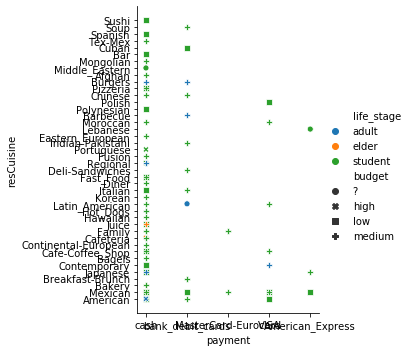

In [25]:
sns.relplot(data=userdf, x='payment', y='resCuisine', hue='life_stage', style='budget')

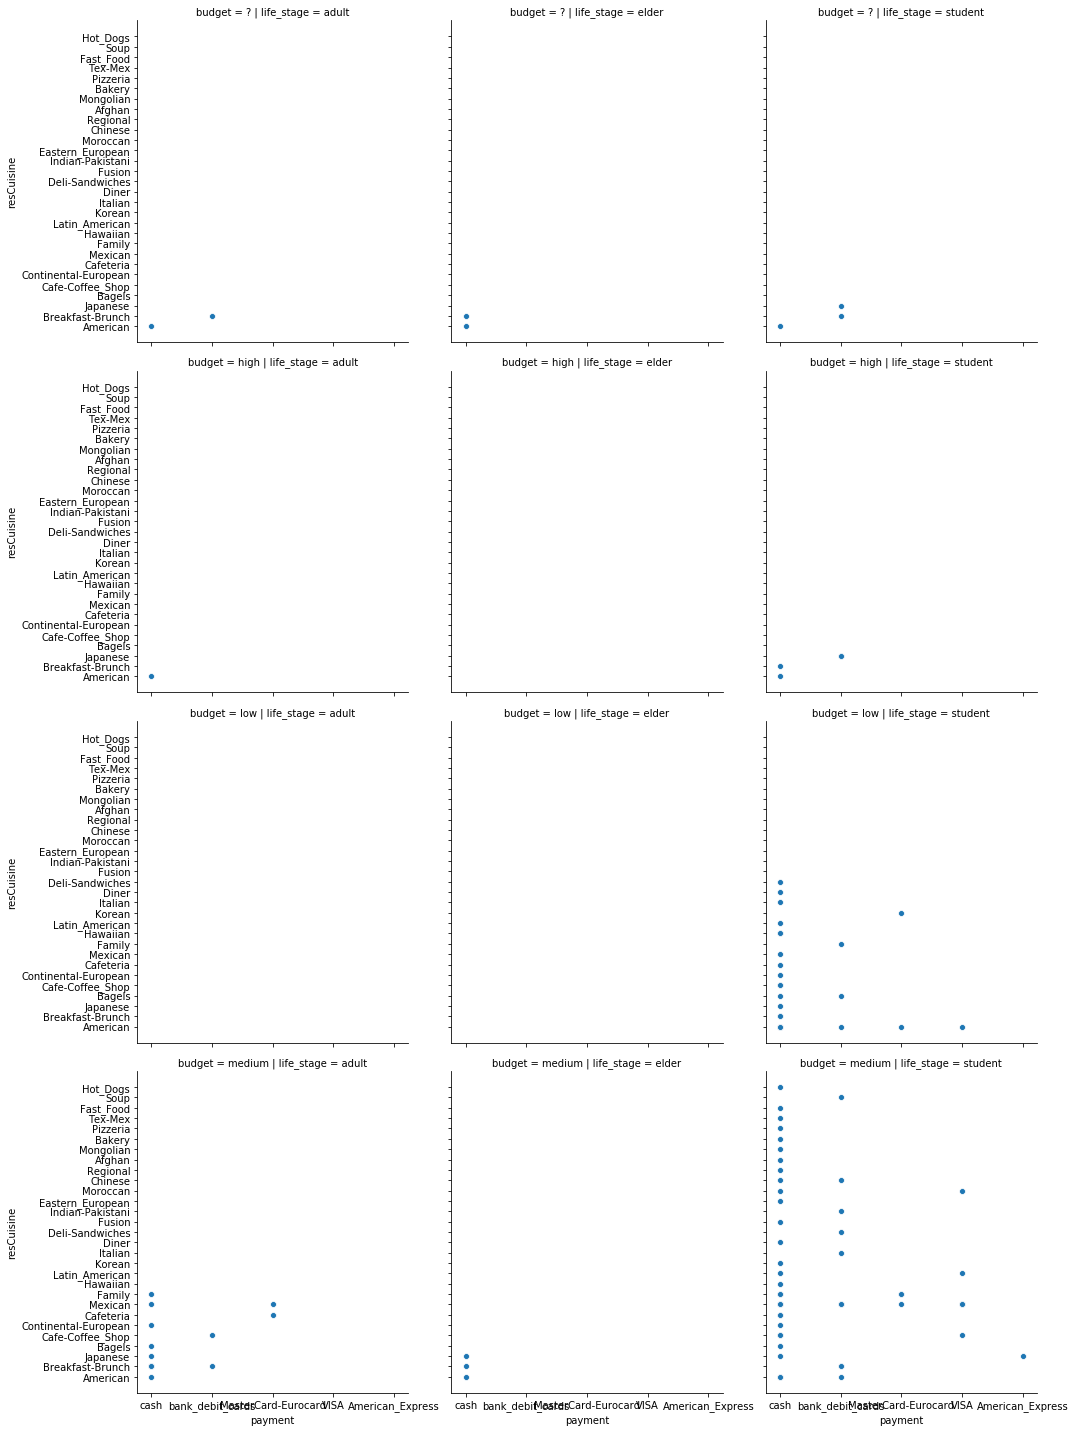

In [26]:
sns.relplot(data=userdf, x='payment', y='resCuisine', col='life_stage', row='budget')